# Bike rides in Cracow in 2019

#### Loading libraries

In [1]:
import pandas as pd
import numpy as np
from datetime import timedelta, date
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import warnings
import geopandas as gpd
import folium as fl
from scipy import stats 
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import statsmodels.formula.api as smf
import statsmodels.api as sm
import statsmodels
warnings.filterwarnings("ignore")

#### Definitions

In [2]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize']=(18,10)

# KRAKÓW

#### Wczytanie danych dotyczących prezjazdów rowerowych w Krakowie

In [3]:
cracow = pd.read_excel('data/Cracow_bike.xlsx')

In [4]:
cracow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35568 entries, 0 to 35567
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Time                     35568 non-null  datetime64[ns]
 1   MOGILSKA                 35540 non-null  float64       
 2   WIELICKA                 35535 non-null  float64       
 3   BULWAR KURLANDZKI        35540 non-null  float64       
 4   WADOWICKA                35534 non-null  float64       
 5   KOTLARSKA                35140 non-null  float64       
 6   MONTE CASSINO            26853 non-null  float64       
 7   TYNIECKA                 26853 non-null  float64       
 8   SMOLEŃSK/DUNIN W.        26997 non-null  float64       
 9   DWORZEC GŁ/WITA STWOSZA  26829 non-null  float64       
 10  KOPERNIKA                21238 non-null  float64       
 11  KOPERNIKA.1              21238 non-null  float64       
 12  KLIMECKIEGO              21310 n

In [5]:
cracow.describe().T

count       mean        std  min  25%   50%  \
MOGILSKA                 35540.0  80.764828  96.859186  0.0  9.0  42.0   
WIELICKA                 35535.0  34.336457  44.847707  0.0  3.0  15.0   
BULWAR KURLANDZKI        35540.0  63.866404  94.767304  0.0  3.0  21.0   
WADOWICKA                35534.0  30.906034  42.313075  0.0  3.0  14.0   
KOTLARSKA                35140.0  62.161611  85.407562  0.0  5.0  27.0   
MONTE CASSINO            26853.0  56.657953  69.945396  0.0  6.0  27.0   
TYNIECKA                 26853.0  54.155104  96.764643  0.0  2.0  14.0   
SMOLEŃSK/DUNIN W.        26997.0  25.623847  26.788035  0.0  3.0  17.0   
DWORZEC GŁ/WITA STWOSZA  26829.0  36.900332  44.874581  0.0  4.0  20.0   
KOPERNIKA                21238.0  39.187871  47.087147  0.0  3.0  21.0   
KOPERNIKA.1              21238.0  35.717299  41.371086  0.0  5.0  21.0   
KLIMECKIEGO              21310.0  21.936790  29.441712  0.0  1.0  10.0   
KLIMECKIEGO.1            21310.0  22.848240  30.443200  0.0  3.0  11.0   
NOWOHUCKA                21309.0  22.237130  28.597155  0.0  2.0  10.0   
BORA KOMOROWSKIEGO       21310.0  30.332238  37.365172  0.0  3.0  15.0   

                            75%     max  
MOGILSKA                 121.25   566.0  
WIELICKA                  50.00   309.0  
BULWAR KURLANDZKI         86.00   707.0  
WADOWICKA                 43.00   653.0  
KOTLARSKA                 90.00  4095.0  
MONTE CASSINO             83.00   488.0  
TYNIECKA                  61.00   934.0  
SMOLEŃSK/DUNIN W.         41.00   172.0  
DWORZEC GŁ/WITA STWOSZA   55.00   269.0  
KOPERNIKA                 61.00   315.0  
KOPERNIKA.1               53.00   244.0  
KLIMECKIEGO               31.00   180.0  
KLIMECKIEGO.1             31.00   209.0  
NOWOHUCKA                 31.00   206.0  
BORA KOMOROWSKIEGO        44.00   317.0

In [6]:
cracow = cracow[(cracow.Time.dt.year>2018)&(cracow.Time.dt.year<2020)]

In [7]:
# rozmiar danych
cracow.shape

(8760, 16)

In [8]:
#kolumny w danych
cracow.columns

Index(['Time', 'MOGILSKA', 'WIELICKA', 'BULWAR KURLANDZKI', 'WADOWICKA',
       'KOTLARSKA', 'MONTE CASSINO', 'TYNIECKA', 'SMOLEŃSK/DUNIN W.',
       'DWORZEC GŁ/WITA STWOSZA', 'KOPERNIKA', 'KOPERNIKA.1', 'KLIMECKIEGO',
       'KLIMECKIEGO.1', 'NOWOHUCKA', 'BORA KOMOROWSKIEGO'],
      dtype='object')

#### Sprawdzenie braków w danych

In [9]:
#liczba braków w danych
cracow.isnull().sum()

Time                       0
MOGILSKA                   1
WIELICKA                   1
BULWAR KURLANDZKI          1
WADOWICKA                  1
KOTLARSKA                  1
MONTE CASSINO              1
TYNIECKA                   1
SMOLEŃSK/DUNIN W.          1
DWORZEC GŁ/WITA STWOSZA    1
KOPERNIKA                  1
KOPERNIKA.1                1
KLIMECKIEGO                1
KLIMECKIEGO.1              1
NOWOHUCKA                  1
BORA KOMOROWSKIEGO         1
dtype: int64

In [10]:
cracow[cracow.isnull().any(axis=1)]

Time  MOGILSKA  WIELICKA  BULWAR KURLANDZKI  WADOWICKA  \
20714 2019-03-31 02:00:00       NaN       NaN                NaN        NaN   

       KOTLARSKA  MONTE CASSINO  TYNIECKA  SMOLEŃSK/DUNIN W.  \
20714        NaN            NaN       NaN                NaN   

       DWORZEC GŁ/WITA STWOSZA  KOPERNIKA  KOPERNIKA.1  KLIMECKIEGO  \
20714                      NaN        NaN          NaN          NaN   

       KLIMECKIEGO.1  NOWOHUCKA  BORA KOMOROWSKIEGO  
20714            NaN        NaN                 NaN

In [11]:
cracow.set_index('Time',inplace=True)

### Description of the data on journeys received from Cracow - 2019  
8760 observations (records) in 16 series (there is data in 15 measurement points).  
SERIES (columns):  
- 'Time', 'MOGILSKA', 'WIELICKA', 'BULWAR KURLANDZKI', 'WADOWICKA', 'KOTLARSKA', 'MONTE CASSINO', 'TYNIECKA', 'SMOLEŃSK/DUNIN W.', 'DWORZEC GŁ/WITA STWOSZA', 'KOPERNIKA', 'KOPERNIKA.1', 'KLIMECKIEGO','KLIMECKIEGO.1', 'NOWOHUCKA', 'BORA KOMOROWSKIEGO'  

NUMBER OF DATA GAPS:
 - no observations were recorded on all induction loops on 03/31/2019 at 02:00 (Saturday / Sunday night) - similar to Gdańsk (see Gdansk)   

COMPLETION OF GAPS:  
- the number of journeys between 2019-03-15 and 2019-04-15 was averaged from Saturday to Sunday at 02:00 in individual measurement loops and updated Nan fields in all series.

#### Number of cyclists' journeys through individual measurement loops in 2019

In [12]:
measuring_loop = pd.DataFrame(cracow.sum())
measuring_loop = measuring_loop.sort_values(by=0,ascending=False)

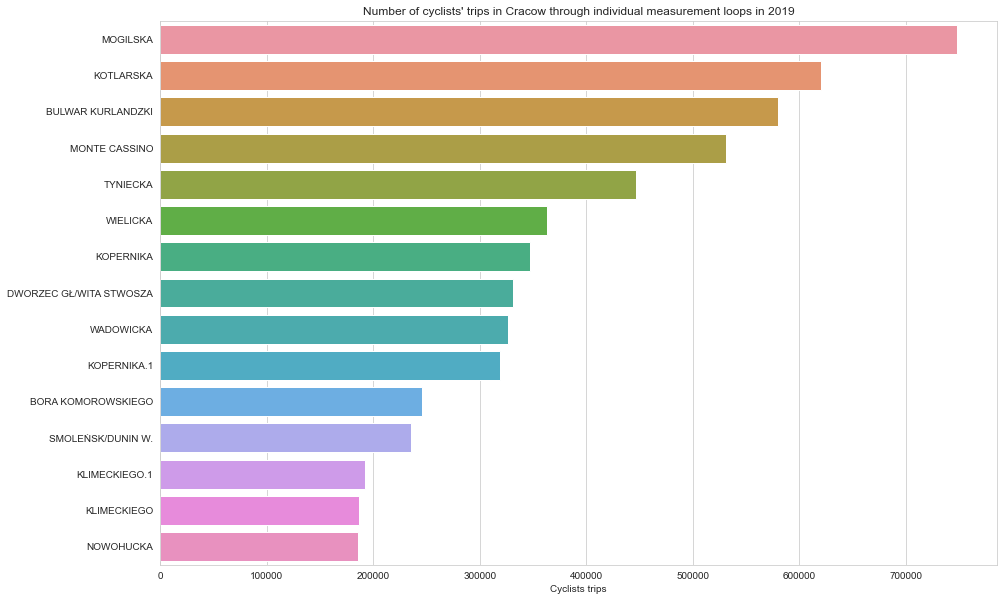

In [13]:
plt.figure(figsize=(15,10))
plt.title("Number of cyclists' trips in Cracow through individual measurement loops in 2019")
sns.barplot(data = measuring_loop, x = measuring_loop[0], y = measuring_loop.index, orient='h', ci=None)
plt.xlabel('Cyclists trips')
plt.show()

#### Loading data coordinates of the measurment points

In [14]:
cracow_measuring = pd.read_csv('data/Cracow_measurement_points.csv')

In [15]:
cracow_measuring

Unnamed: 0        dl      szer
0                  MOGILSKA  50.06633  19.96166
1                  WIELICKA  50.01770  19.99005
2         BULWAR KURLANDZKI  50.05130  19.95537
3                 WADOWICKA  50.03282  19.93871
4                 KOTLARSKA  50.05479  19.95927
5             MONTE CASSINO  50.04710  19.92726
6                  TYNIECKA  50.03657  19.88899
7         SMOLEŃSK/DUNIN W.  50.05825  19.92613
8   DWORZEC GŁ/WITA STWOSZA  50.06853  19.95135
9                 KOPERNIKA  50.06377  19.95505
10              KOPERNIKA.1  50.06548  19.95696
11              KLIMECKIEGO  50.04530  19.97250
12            KLIMECKIEGO.1  50.04685  19.97075
13                NOWOHUCKA  50.05368  19.99250
14       BORA KOMOROWSKIEGO  50.08711  19.99331

In [16]:
cracow_measuring.rename(columns={'Unnamed: 0':'Punkt'},inplace=True)

In [17]:
for i in range(0,cracow_measuring.shape[0]):
    street = cracow_measuring.loc[i,'Punkt']
    cracow_measuring.loc[i,'Journeys'] = cracow[street].sum()

In [18]:
cracow_measuring.describe()

dl       szer       Journeys
count  15.000000  15.000000      15.000000
mean   50.053039  19.955991  377428.266667
std     0.016783   0.027964  173180.047935
min    50.017700  19.888990  185772.000000
25%    50.046075  19.945030  240736.500000
50%    50.053680  19.956960  331150.000000
75%    50.064625  19.971625  489053.000000
max    50.087110  19.993310  748323.000000

In [19]:
for i in range(0,cracow_measuring.shape[0]):
    if cracow_measuring.loc[i,'Journeys']<240737:
        cracow_measuring.loc[i,'iszer'] = 15
    else:
        if ((cracow_measuring.loc[i,'Journeys']>240736)and(cracow_measuring.loc[i,'Journeys']<331151)):
            cracow_measuring.loc[i,'iszer'] = 20
        else:
            if ((cracow_measuring.loc[i,'Journeys']>331150) and (cracow_measuring.loc[i,'Journeys'] < 489054)):
                cracow_measuring.loc[i,'iszer'] = 25
            else:
                if (cracow_measuring.loc[i,'Journeys']>489053):
                    cracow_measuring.loc[i,'iszer'] = 30

## Map of measuring points for bicycle journeys in Cracow.    
#### The measuring loop, which was adopted for comparison with Gdansk, is marked in green.

In [20]:
cracow_map = fl.Map([50.05436, 19.92657], zoom_start=13, tiles='cartodbpositron')

#punkty pomiarowe
for point in range(0,cracow_measuring.shape[0]):
        if (int(cracow_measuring.loc[point,'Journeys'])>0):
            if point==0:
                fl.Marker(location=[cracow_measuring.loc[point,'dl'], cracow_measuring.loc[point,'szer']], popup = cracow_measuring.loc[point,'Punkt'], name="Measuring points",
                          icon = fl.features.CustomIcon('data/bike_green.png', icon_size=(cracow_measuring.loc[point,'iszer'], cracow_measuring.loc[point,'iszer']))
                         ).add_to(cracow_map)
            else:
                fl.Marker(location=[cracow_measuring.loc[point,'dl'], cracow_measuring.loc[point,'szer']], popup = cracow_measuring.loc[point,'Punkt'], name="Measuring points",
                          icon = fl.features.CustomIcon('data/bike.png', icon_size = (cracow_measuring.loc[point,'iszer'], cracow_measuring.loc[point,'iszer']))
                         ).add_to(cracow_map)
        else:
            fl.Marker(location = [cracow_measuring.loc[point,'dl'], cracow_measuring.loc[point,'szer']], popup = cracow_measuring.loc[point,'Punkt'], name="Measuring points",
                      icon = fl.features.CustomIcon('data/bike_red.png', icon_size=(20,20))
                     ).add_to(cracow_map)
        
fl.TileLayer('cartodbpositron').add_to(cracow_map)
fl.TileLayer('openstreetmap').add_to(cracow_map)
fl.TileLayer('Stamen Terrain').add_to(cracow_map)
fl.TileLayer('stamenwatercolor').add_to(cracow_map)
fl.LayerControl().add_to(cracow_map)
cracow_map

In [21]:
cracow['suma']=cracow.sum(axis=1,skipna=True)

#### Eliminating missing data.

In [22]:
# we average the number of journeys between 2019-03-15 and 2019-04-15 from Saturday to Sunday at 02:00
for column in cracow.columns[0:16]:
    cracow.loc['2019-03-31 02:00',column] = round(cracow[column][(cracow.index.dayofweek==6)&(cracow.index.hour==2)&(cracow.index>'2019-03-15')&(cracow.index<'2019-04-15')].mean())

In [23]:
cracow['day'] = cracow.index.day
cracow['hour'] = cracow.index.hour
cracow['day_of_week'] = cracow.index.dayofweek
cracow['day_name'] = cracow.index.day_name()
cracow['month'] = cracow.index.month
cracow['month_name'] = cracow.index.month_name()
cracow_all = cracow[['suma', 'day', 'hour', 'day_of_week', 'day_name', 'month', 'month_name']]

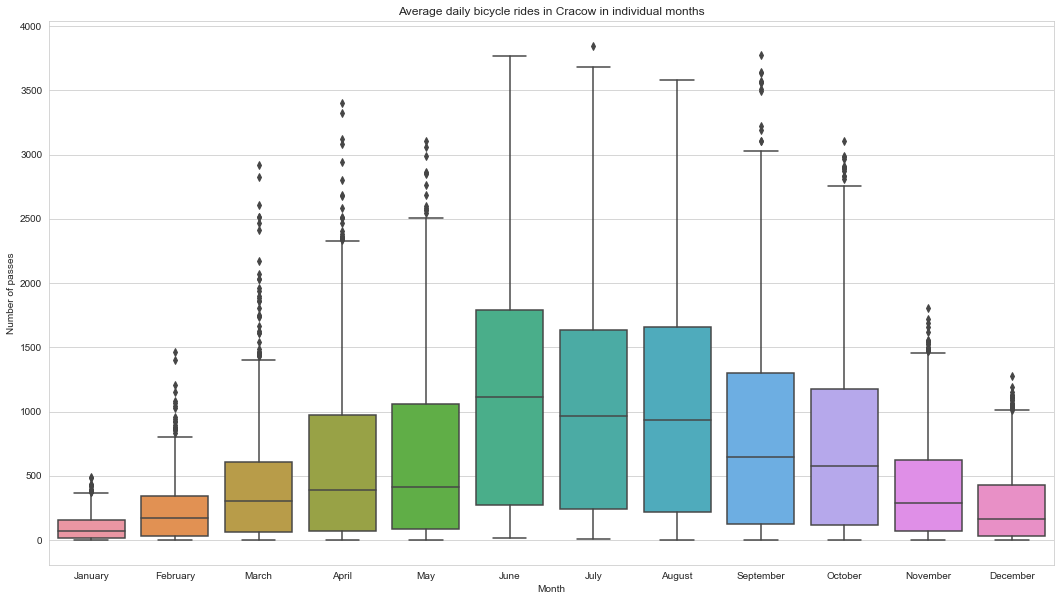

In [24]:
plt.title('Average daily bicycle rides in Cracow in individual months')
sns.boxplot(cracow_all.month, cracow_all.suma)
plt.xlabel('Month')
plt.ylabel('Number of passes')
plt.xticks(range(0,12),labels=['January','February','March','April','May','June','July','August','September','October','November','December'])
plt.show()

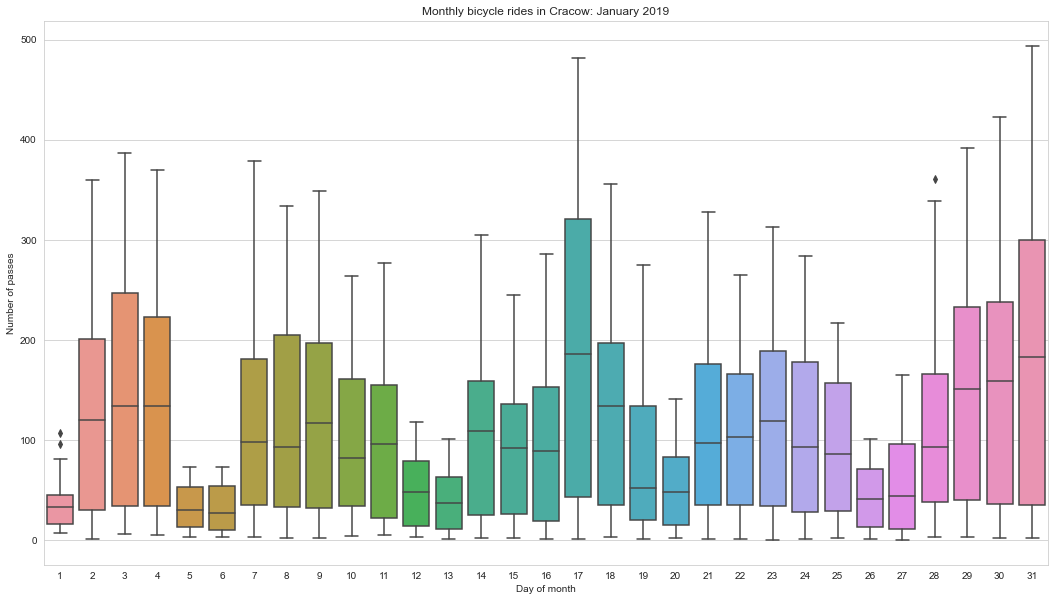

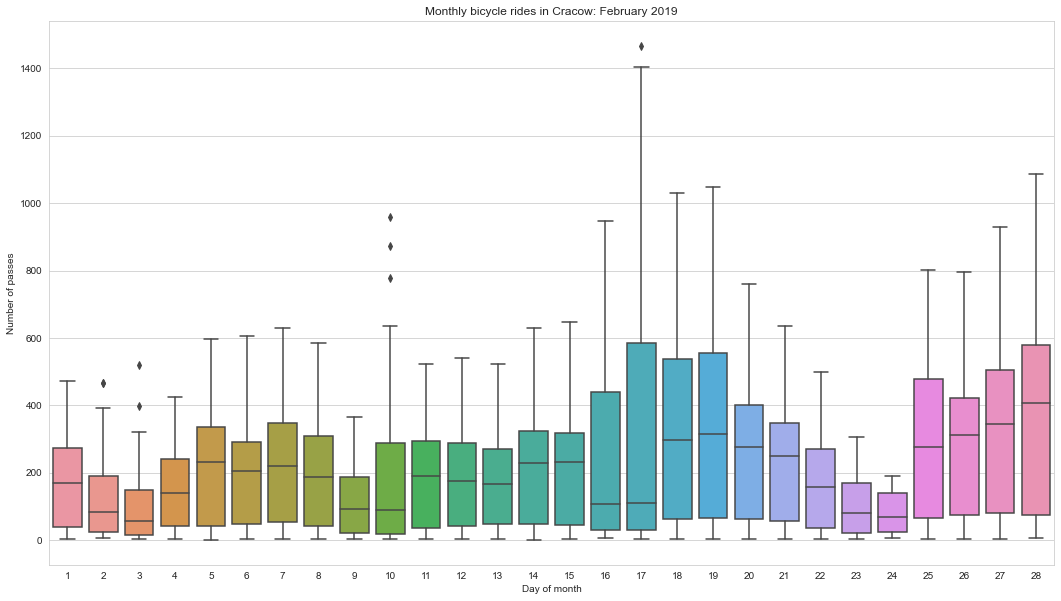

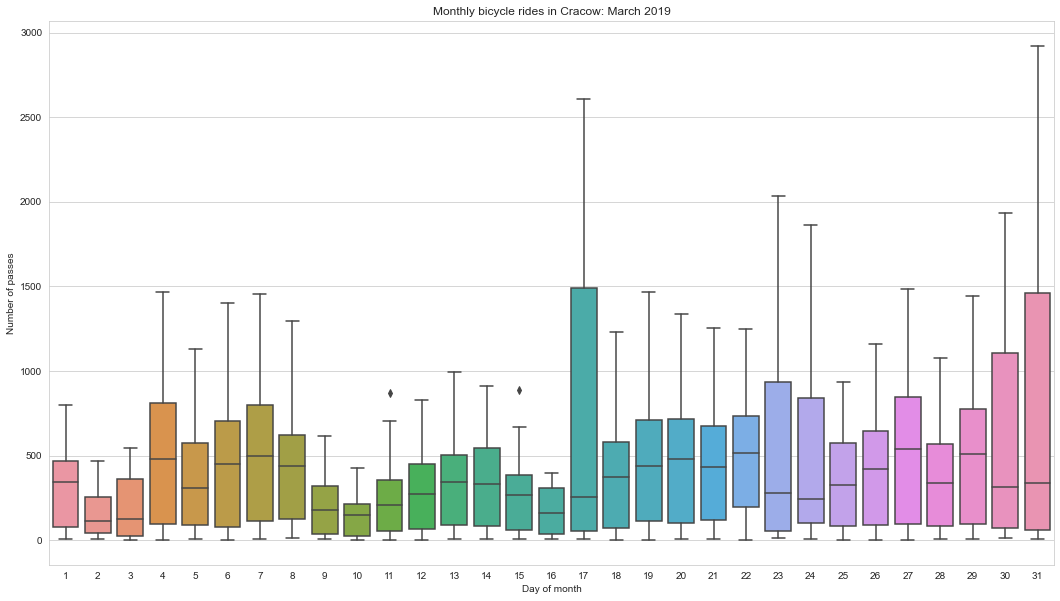

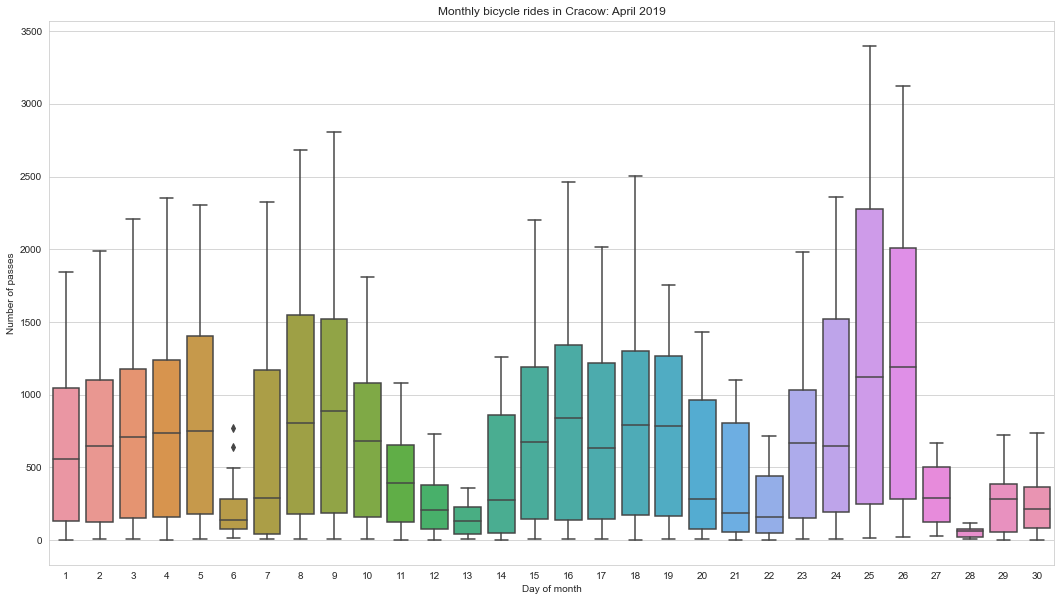

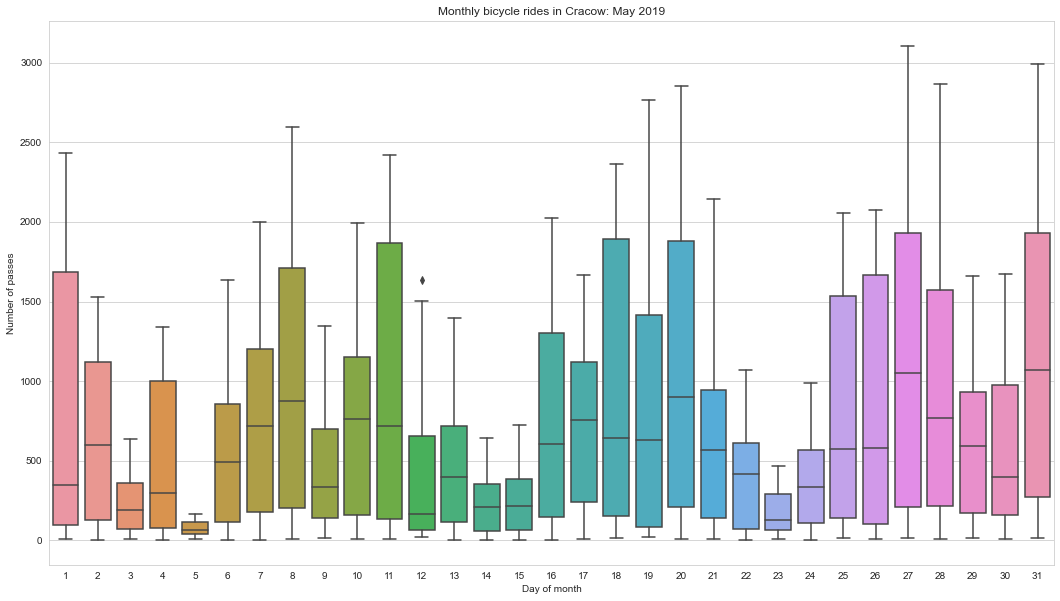

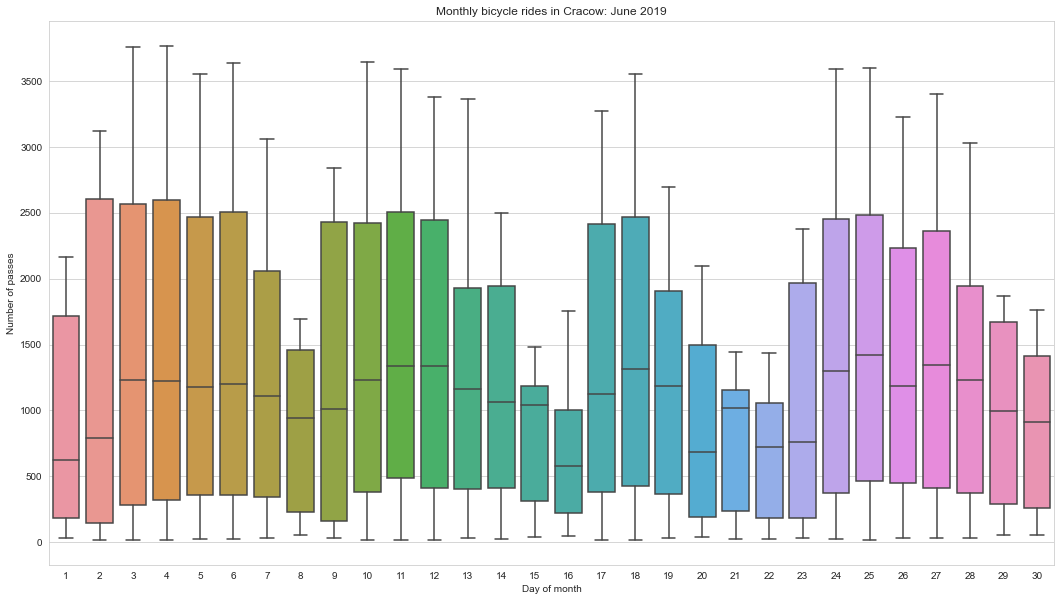

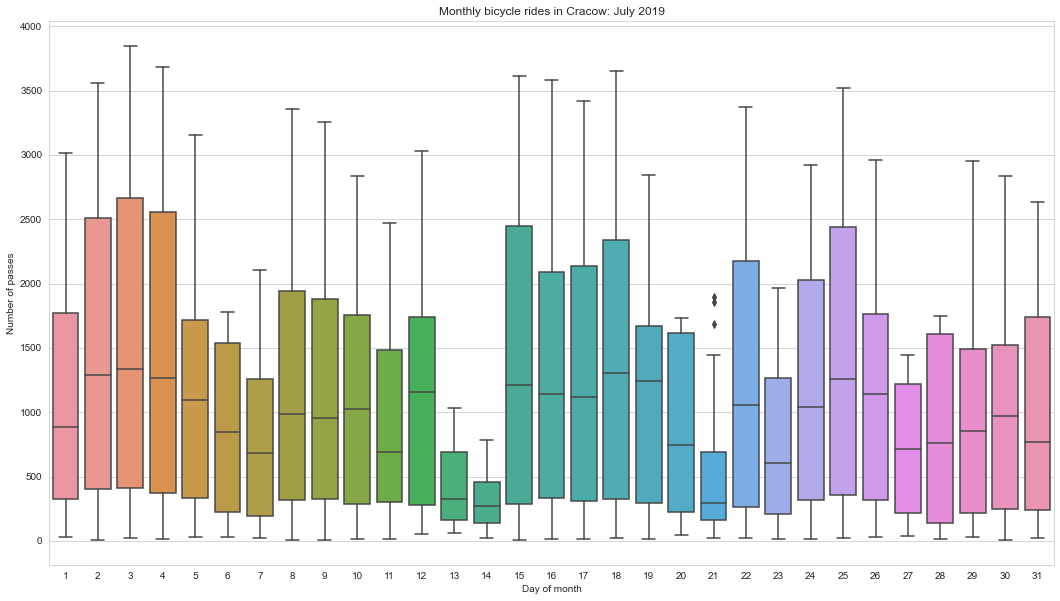

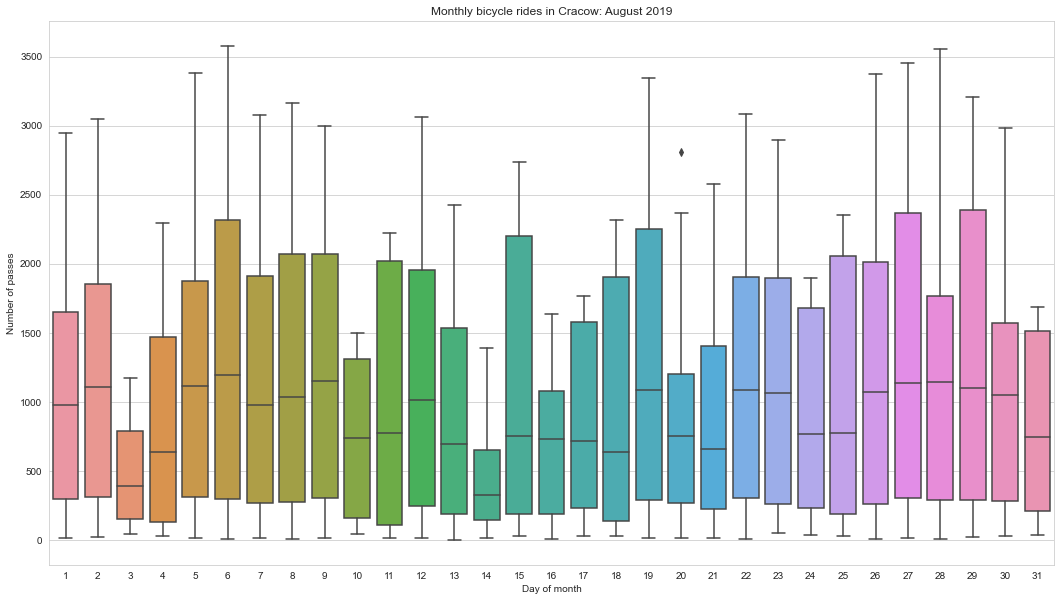

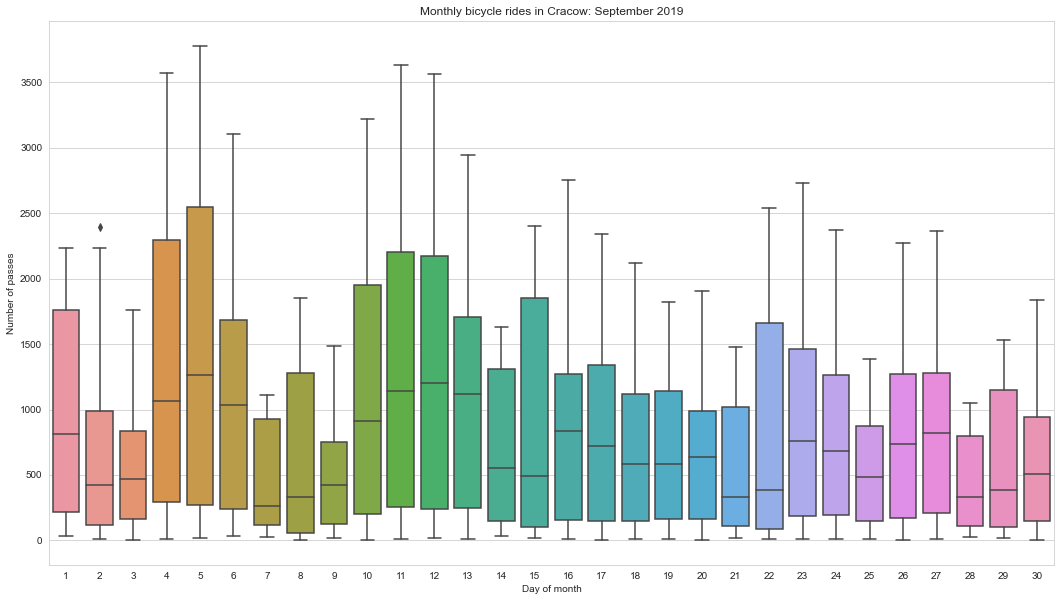

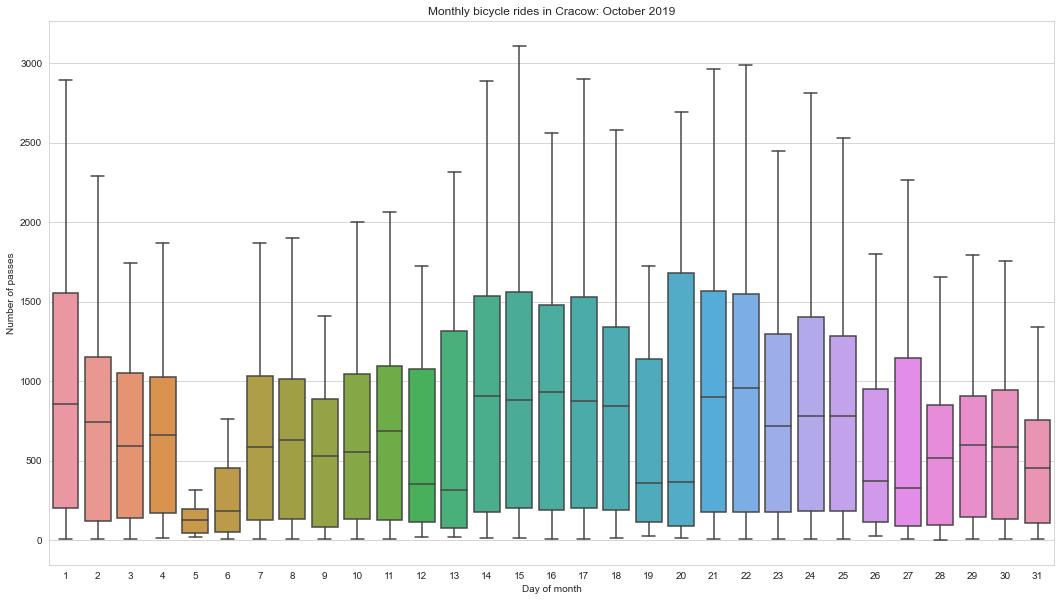

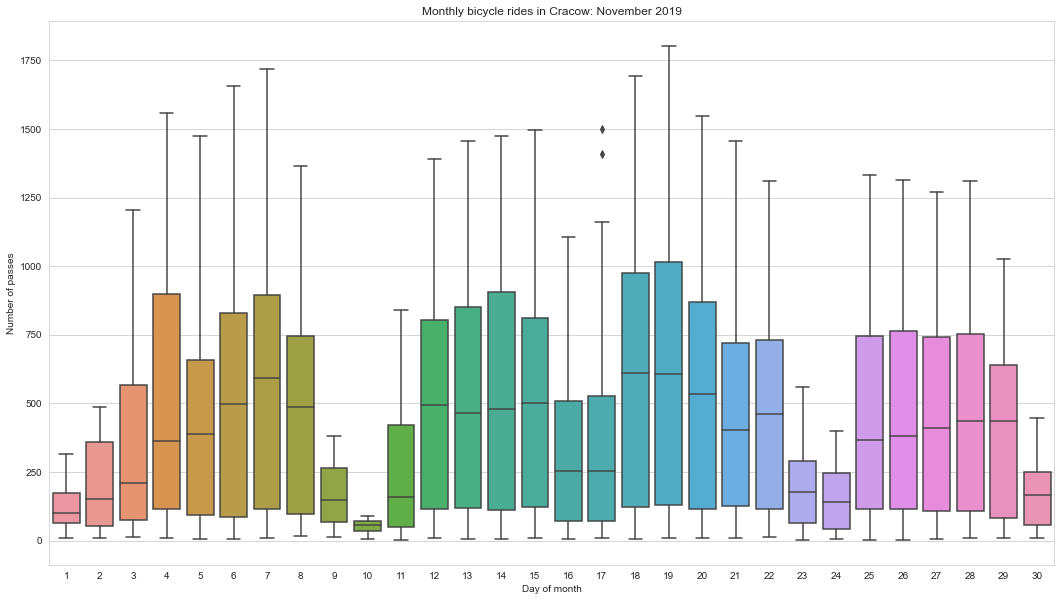

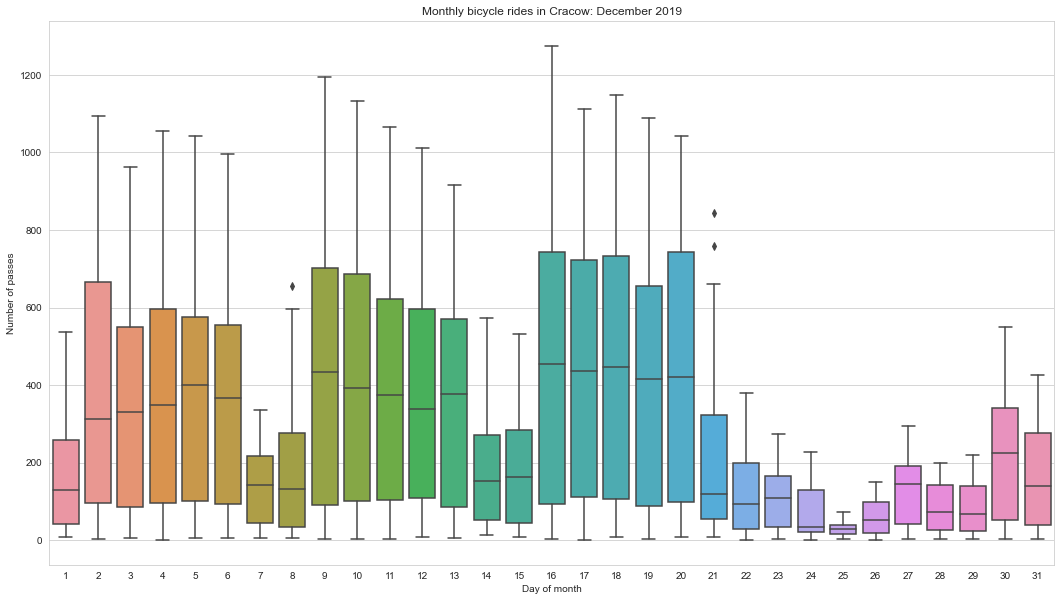

In [25]:
for i, month in zip(cracow_all.month.unique(),cracow_all.month_name.unique()):
    plt.title(f'Monthly bicycle rides in Cracow: {month} 2019')
    sns.boxplot(cracow_all[cracow_all.month == i].day, cracow_all.suma)
    plt.xlabel('Day of month')
    plt.ylabel('Number of passes')
    plt.show()

#### Loading weather data

In [26]:
weather_cracow = pd.read_csv('data/Cracow_DAY_weather_PCA.csv',sep=',',encoding='ansi')

In [27]:
weather_cracow.columns

Index(['data', 'Cloud_cover', 'Wind_speed', 'Temperature', 'Pressure',
       'Precipitation', 'Season', 'comp_0', 'comp_1', 'comp_2', 'comp_3',
       'comp_4'],
      dtype='object')

In [28]:
weather_cracow

data  Cloud_cover  Wind_speed  Temperature     Pressure  \
0    2019-01-01     7.333333    5.625000     2.550000   988.370833   
1    2019-01-02     7.833333    6.875000     0.379167   983.708333   
2    2019-01-03     6.958333    5.708333    -2.662500   993.520833   
3    2019-01-04     7.583333    4.250000    -3.225000   995.825000   
4    2019-01-05     7.791667    5.166667     0.708333   984.433333   
..          ...          ...         ...          ...          ...   
360  2019-12-27     7.375000    4.208333     2.029167   993.975000   
361  2019-12-28     7.958333    4.708333    -0.029167  1003.425000   
362  2019-12-29     7.916667    2.000000    -1.341667  1008.575000   
363  2019-12-30     6.541667    3.166667     0.125000  1003.408333   
364  2019-12-31     6.083333    6.625000     4.433333   995.616667   

     Precipitation  Season    comp_0    comp_1    comp_2    comp_3    comp_4  
0         0.091667       4  1.709407 -1.004130 -0.410442  0.899036 -0.124129  
1         0.195833       4  2.718771 -0.769607 -0.738883  1.207612  0.264982  
2         0.025000       4  1.501121 -1.910966 -0.202301  1.112889  0.046122  
3         0.016667       4  1.175846 -2.001402  0.574084  0.605861 -0.334658  
4         0.204167       4  2.189998 -0.603717  0.018222  0.568699  0.125701  
..             ...     ...       ...       ...       ...       ...       ...  
360       0.020833       4  0.950485 -1.429825  0.282454  0.572786 -0.526376  
361       0.025000       4  0.888791 -2.172830  0.678161  1.440685 -0.934670  
362       0.000000       4 -0.119855 -2.392977  2.042766  0.618448 -1.260396  
363       0.000000       4 -0.010607 -2.039739  1.124608  0.831302 -0.596836  
364       0.000000       4  1.008390 -1.539932 -0.916919  1.807283 -0.172421  

[365 rows x 12 columns]

In [29]:
weather_cracow.data = pd.to_datetime(weather_cracow.data)

In [30]:
cracow_all['data'] = cracow_all.index.date
cracow_all.data = pd.to_datetime(cracow_all.data)
merged = pd.merge(cracow_all, weather_cracow, how='left', on="data")
merged.rename(columns={'suma':'Journeys','data':'Date'}, inplace=True)

In [31]:
merged

Journeys  day  hour  day_of_week day_name  month month_name       Date  \
0         13.0    1     0            1  Tuesday      1    January 2019-01-01   
1         15.0    1     1            1  Tuesday      1    January 2019-01-01   
2         19.0    1     2            1  Tuesday      1    January 2019-01-01   
3         12.0    1     3            1  Tuesday      1    January 2019-01-01   
4         11.0    1     4            1  Tuesday      1    January 2019-01-01   
...        ...  ...   ...          ...      ...    ...        ...        ...   
8755      88.0   31    19            1  Tuesday     12   December 2019-12-31   
8756      60.0   31    20            1  Tuesday     12   December 2019-12-31   
8757      35.0   31    21            1  Tuesday     12   December 2019-12-31   
8758      45.0   31    22            1  Tuesday     12   December 2019-12-31   
8759      45.0   31    23            1  Tuesday     12   December 2019-12-31   

      Cloud_cover  Wind_speed  Temperature    Pressure  Precipitation  Season  \
0        7.333333       5.625     2.550000  988.370833       0.091667       4   
1        7.333333       5.625     2.550000  988.370833       0.091667       4   
2        7.333333       5.625     2.550000  988.370833       0.091667       4   
3        7.333333       5.625     2.550000  988.370833       0.091667       4   
4        7.333333       5.625     2.550000  988.370833       0.091667       4   
...           ...         ...          ...         ...            ...     ...   
8755     6.083333       6.625     4.433333  995.616667       0.000000       4   
8756     6.083333       6.625     4.433333  995.616667       0.000000       4   
8757     6.083333       6.625     4.433333  995.616667       0.000000       4   
8758     6.083333       6.625     4.433333  995.616667       0.000000       4   
8759     6.083333       6.625     4.433333  995.616667       0.000000       4   

        comp_0    comp_1    comp_2    comp_3    comp_4  
0     1.709407 -1.004130 -0.410442  0.899036 -0.124129  
1     1.709407 -1.004130 -0.410442  0.899036 -0.124129  
2     1.709407 -1.004130 -0.410442  0.899036 -0.124129  
3     1.709407 -1.004130 -0.410442  0.899036 -0.124129  
4     1.709407 -1.004130 -0.410442  0.899036 -0.124129  
...        ...       ...       ...       ...       ...  
8755  1.008390 -1.539932 -0.916919  1.807283 -0.172421  
8756  1.008390 -1.539932 -0.916919  1.807283 -0.172421  
8757  1.008390 -1.539932 -0.916919  1.807283 -0.172421  
8758  1.008390 -1.539932 -0.916919  1.807283 -0.172421  
8759  1.008390 -1.539932 -0.916919  1.807283 -0.172421  

[8760 rows x 19 columns]

In [32]:
merged.to_pickle('data/cracow_journeys.pkl')

In [33]:
merged = merged.groupby('Date').agg({'Journeys':'sum', 'Cloud_cover':'mean', 'Wind_speed':'mean',
       'Temperature':'mean', 'Pressure':'mean', 'Precipitation':'mean',
       'comp_0':'mean', 'comp_1':'mean', 'comp_2':'mean', 'comp_3':'mean', 'comp_4':'mean','Season':'mean'}).reset_index()

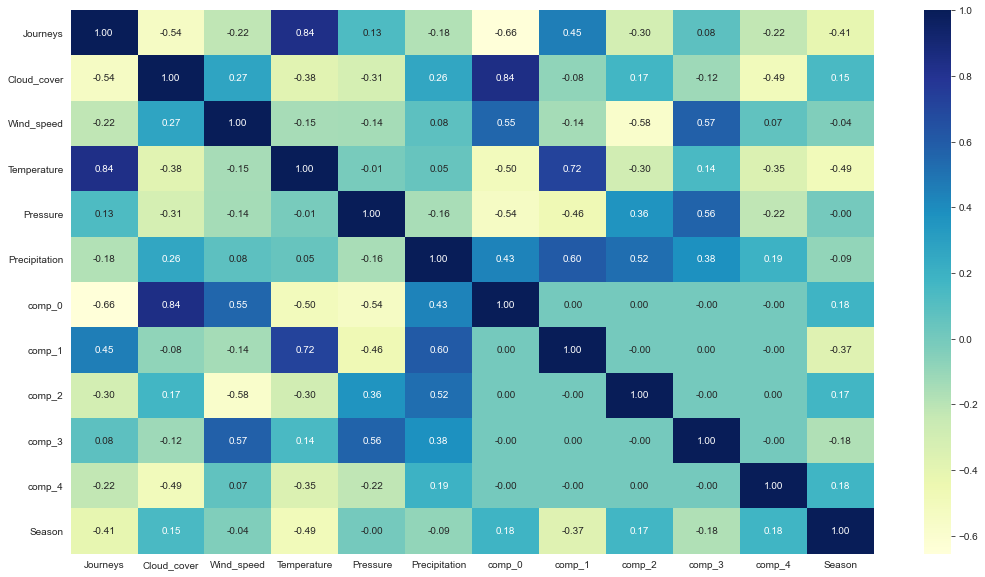

In [34]:
corr_map = sns.heatmap(merged.corr(), cmap="YlGnBu", fmt='.2f', annot = True)

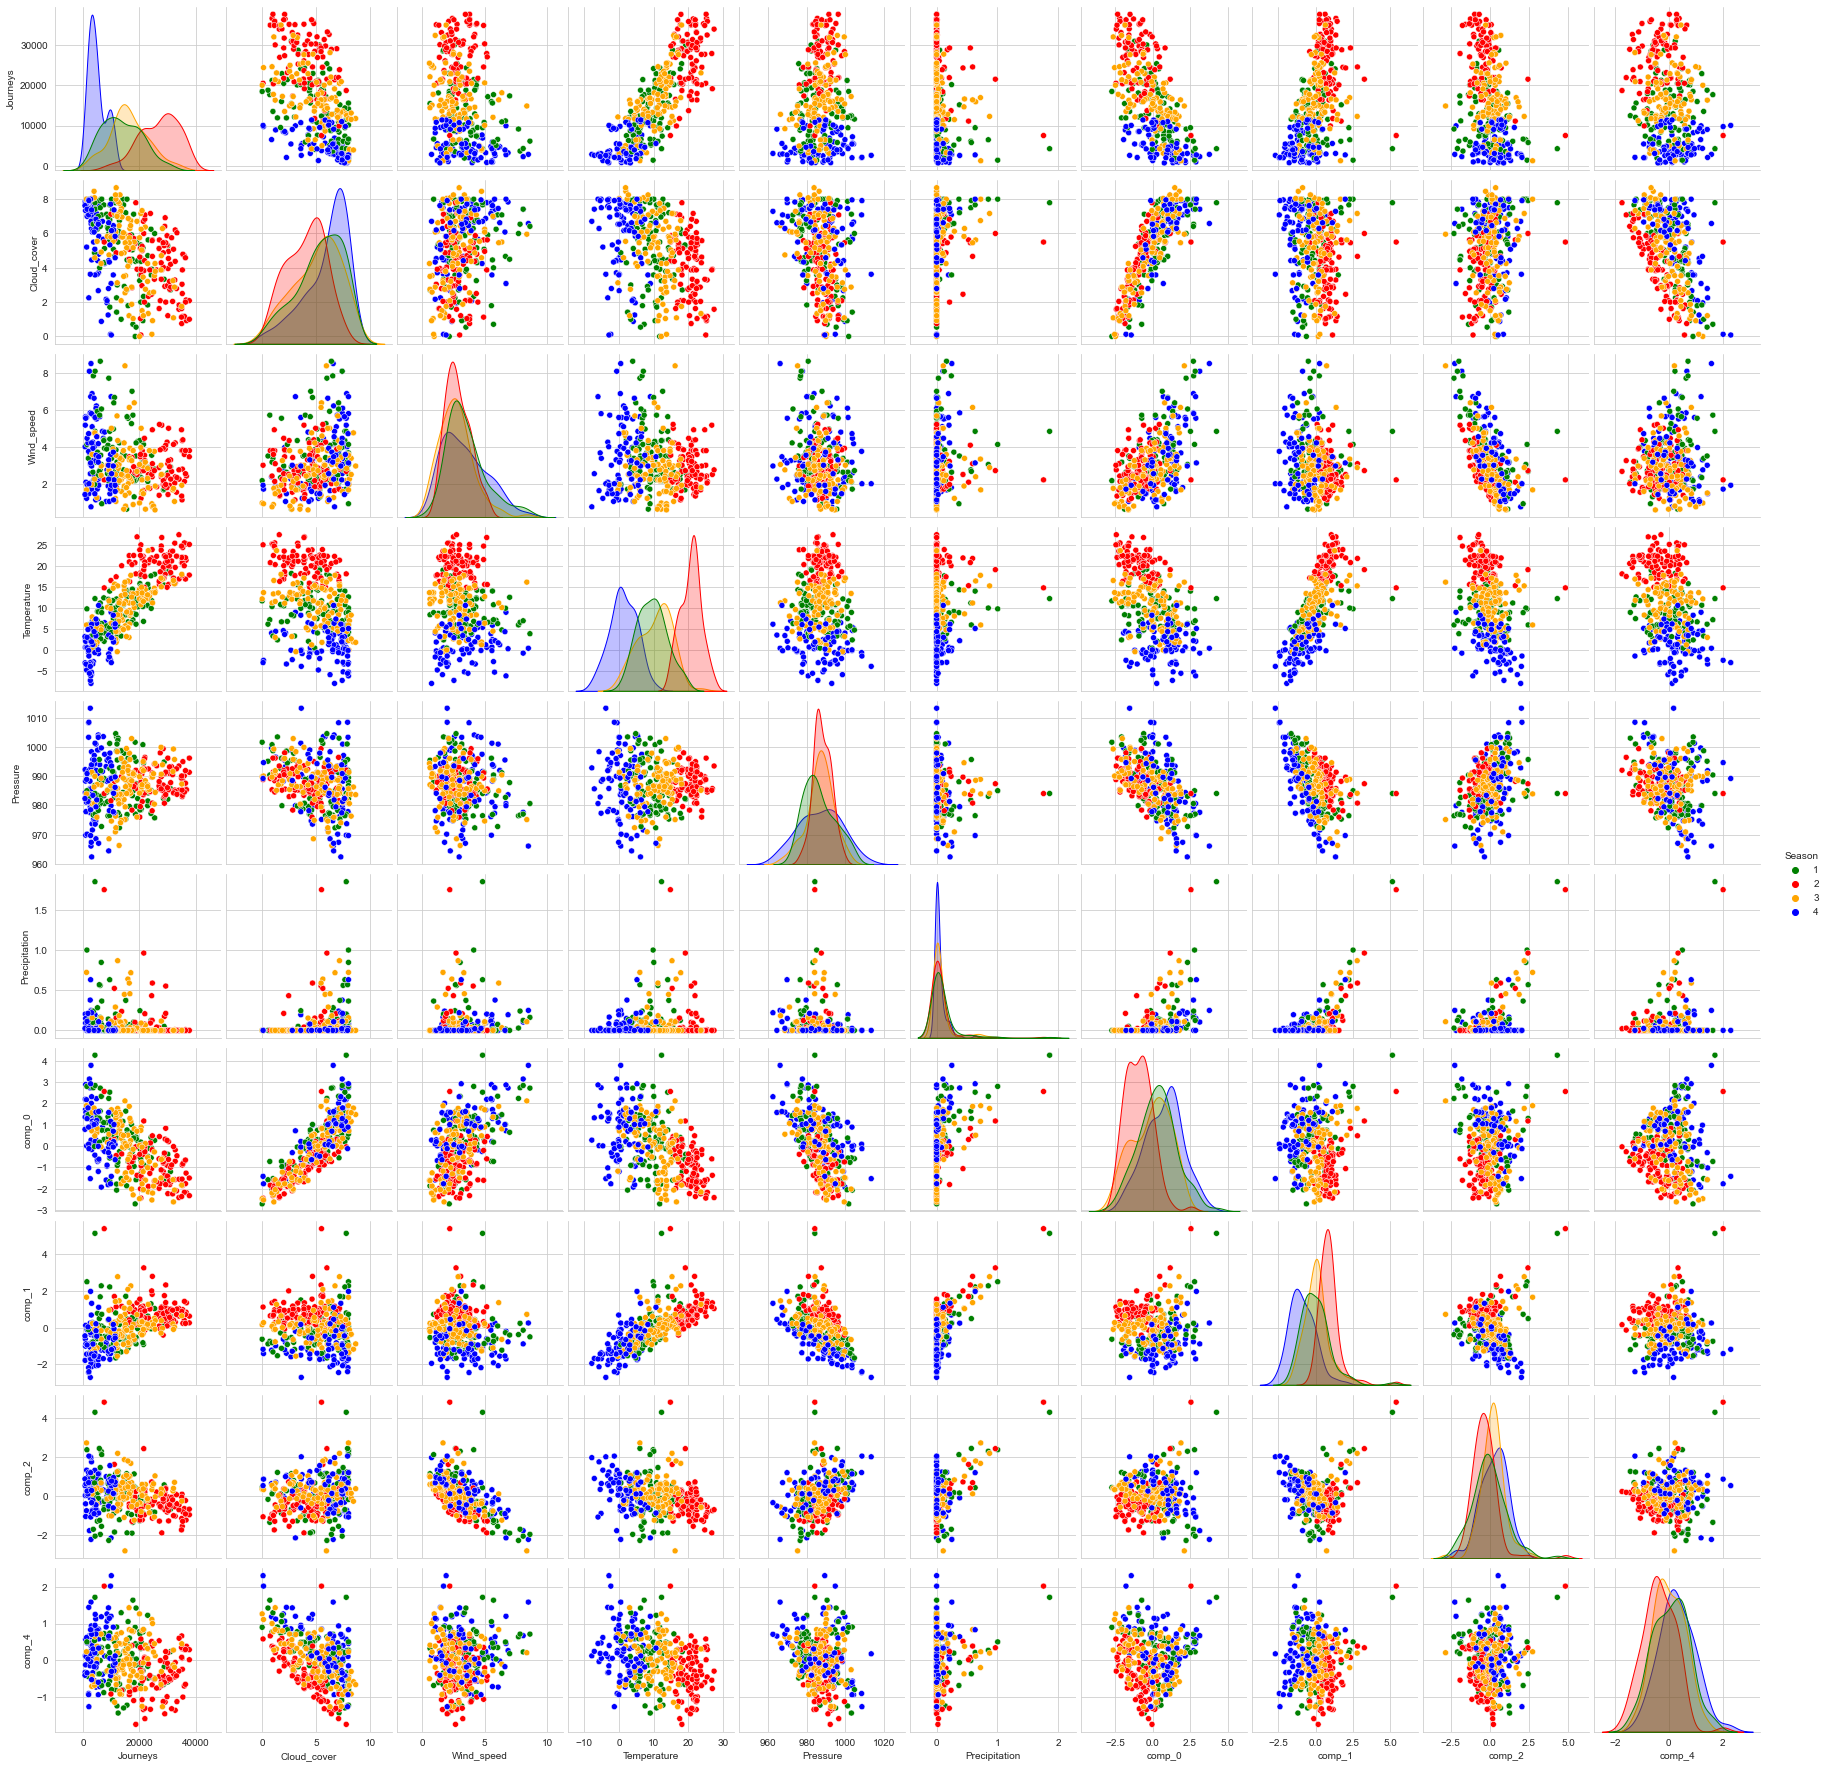

In [35]:
_=sns.pairplot(merged, vars=['Journeys','Cloud_cover',
                            'Wind_speed','Temperature','Pressure',
                            'Precipitation','comp_0','comp_1','comp_2','comp_4'], hue="Season", palette=['green','red','orange','blue'])

In [39]:
cracow_agg = merged.groupby('Date').agg({'Journeys':'sum','Temperature': 'mean','Cloud_cover': 'mean','Wind_speed': 'mean','comp_0':'mean','comp_1':'mean','Season':'max'}).reset_index()

#### Standardization...

In [40]:
stdscaler = StandardScaler()

In [41]:
cracow_agg['tempscaled'] = stdscaler.fit_transform(cracow_agg.Temperature.values.reshape(-1,1))
cracow_agg['cloudscaled'] = stdscaler.fit_transform(cracow_agg.Cloud_cover.values.reshape(-1,1))
cracow_agg['windscaled'] = stdscaler.fit_transform(cracow_agg.Wind_speed.values.reshape(-1,1))

Temperature

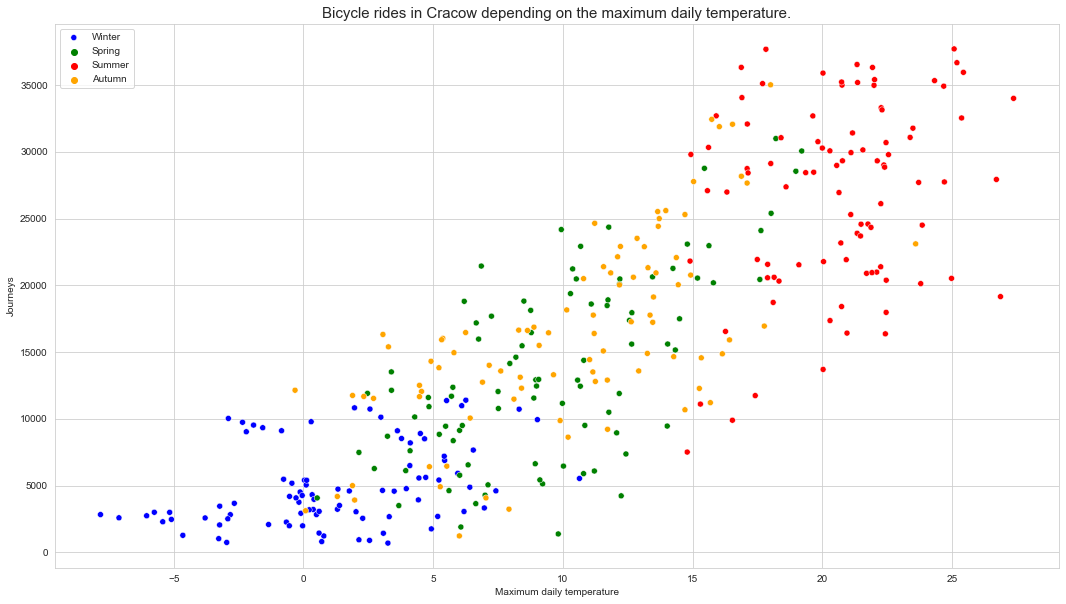

In [42]:
fontdict = {'fontsize':20,'fontweight':'bold'}
fig = plt.figure()
plt.rcParams['figure.figsize'] = [15,10]
plt.subplots_adjust(wspace=0.5, hspace=0.5)

plt.title('Bicycle rides in Cracow depending on the maximum daily temperature.', fontsize=15)
sns.scatterplot(cracow_agg.Temperature, cracow_agg.Journeys, hue = cracow_agg.Season, palette=['green','red','orange','blue'])
plt.xlabel('Maximum daily temperature')
plt.legend(loc='upper left', labels=['Winter','Spring','Summer','Autumn'])
plt.show()

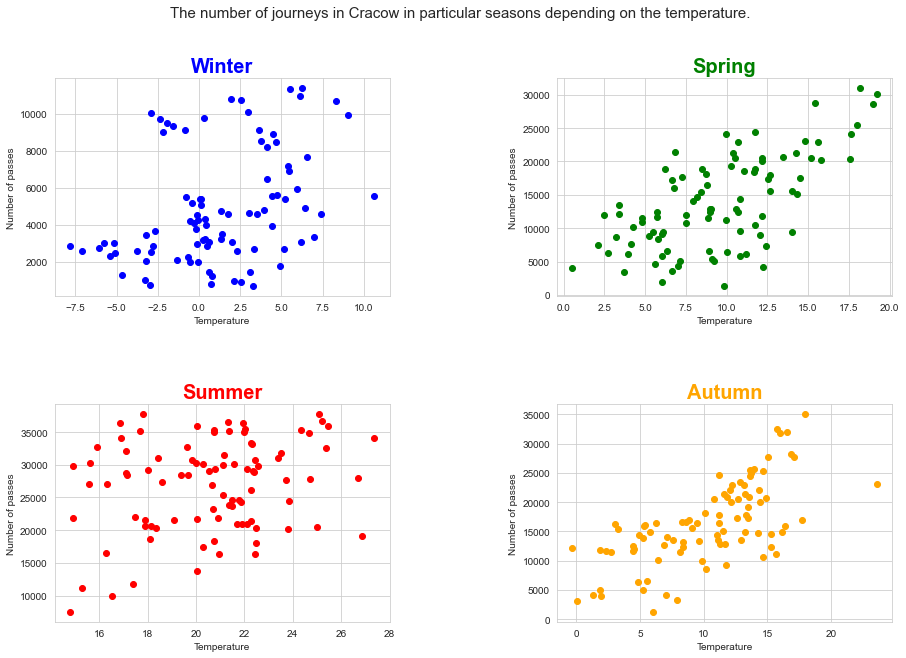

In [43]:
fig3 = plt.figure(figsize=[15,10])
plt.subplots_adjust(wspace=0.5, hspace=0.5)

plt.suptitle('The number of journeys in Cracow in particular seasons depending on the temperature.', fontsize=15)

ax1 = fig3.add_subplot(221)
ax1.scatter('Temperature','Journeys',data = cracow_agg[cracow_agg.Season == 4],c="blue")
ax1.set_title('Winter', color="blue", fontdict = fontdict)
ax1.set_ylabel('Number of passes')
ax1.set_xlabel('Temperature')

ax2 = fig3.add_subplot(222)
ax2.scatter('Temperature','Journeys',data = cracow_agg[cracow_agg.Season == 1],c="green")
ax2.set_title('Spring', color="green", fontdict = fontdict)
ax2.set_ylabel('Number of passes')
ax2.set_xlabel('Temperature')

ax3 = fig3.add_subplot(223)
ax3.scatter('Temperature','Journeys',data = cracow_agg[cracow_agg.Season == 2],c="red")
ax3.set_title('Summer', color="red", fontdict=fontdict)
ax3.set_ylabel('Number of passes')
ax3.set_xlabel('Temperature')

ax4 = fig3.add_subplot(224)
ax4.scatter('Temperature','Journeys',data = cracow_agg[cracow_agg.Season == 3],c="orange")
ax4.set_title('Autumn', color="orange", fontdict = fontdict)
ax4.set_ylabel('Number of passes')
ax4.set_xlabel('Temperature')
plt.show()

<hr>

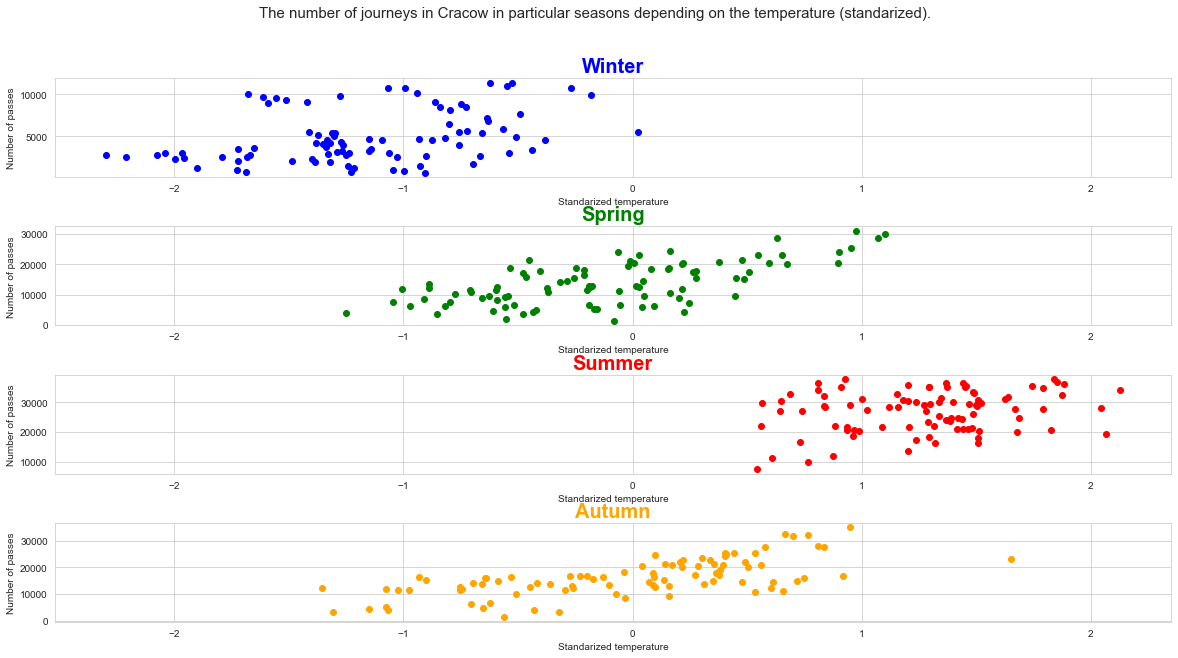

In [44]:
fig4 = plt.figure(figsize=[20,10])
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.suptitle('The number of journeys in Cracow in particular seasons depending on the temperature (standarized).', fontsize=15)

ax1 = fig4.add_subplot(411)
ax1.scatter('tempscaled', 'Journeys', data = cracow_agg[cracow_agg.Season == 4],c="blue")
ax1.set_title('Winter', color="blue", fontdict = fontdict)
ax1.set_ylabel('Number of passes')
ax1.set_xlabel('Standarized temperature')

ax2 = fig4.add_subplot(412, sharex=ax1)
ax2.scatter('tempscaled', 'Journeys', data = cracow_agg[cracow_agg.Season == 1],c="green")
ax2.set_title('Spring', color="green", fontdict = fontdict)
ax2.set_ylabel('Number of passes')
ax2.set_xlabel('Standarized temperature')

ax3 = fig4.add_subplot(413, sharex=ax1)
ax3.scatter('tempscaled', 'Journeys', data = cracow_agg[cracow_agg.Season == 2],c="red")
ax3.set_title('Summer', color="red", fontdict = fontdict)
ax3.set_ylabel('Number of passes')
ax3.set_xlabel('Standarized temperature')

ax4 = fig4.add_subplot(414, sharex=ax1)
ax4.scatter('tempscaled', 'Journeys', data = cracow_agg[cracow_agg.Season == 3],c="orange")
ax4.set_title('Autumn', color="orange", fontdict = fontdict)
ax4.set_ylabel('Number of passes')
ax4.set_xlabel('Standarized temperature')
plt.show()

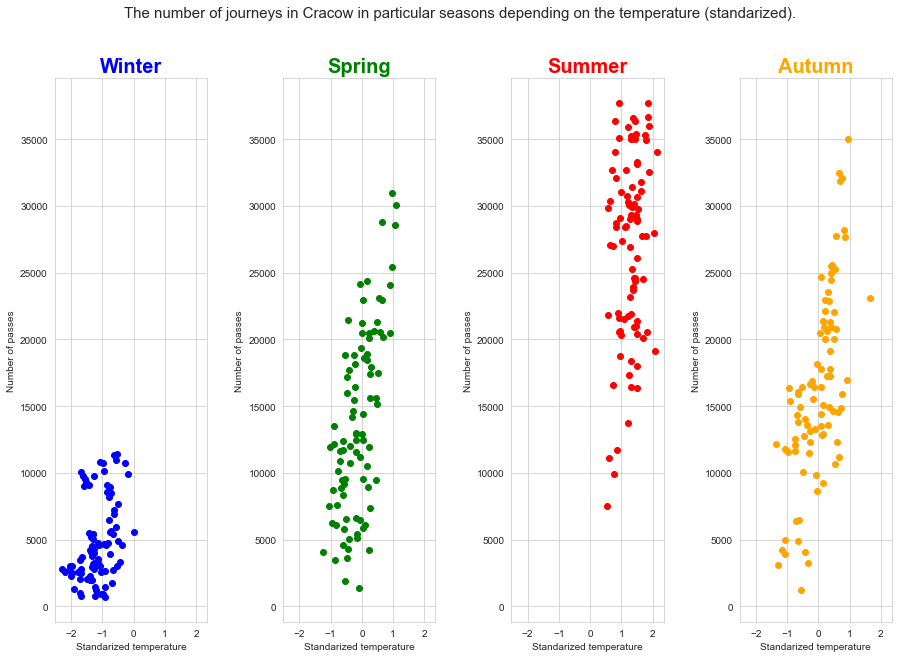

In [45]:
fig5 = plt.figure(figsize=[15,10])
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.suptitle('The number of journeys in Cracow in particular seasons depending on the temperature (standarized).', fontsize=15)

ax1 = fig5.add_subplot(141)
ax1.scatter('tempscaled', 'Journeys', data = cracow_agg[cracow_agg.Season == 4],c="blue")
ax1.set_title('Winter', color="blue", fontdict = fontdict)
ax1.set_ylabel('Number of passes')
ax1.set_xlabel('Standarized temperature')

ax2 = fig5.add_subplot(142, sharex=ax1, sharey=ax1)
ax2.scatter('tempscaled', 'Journeys', data = cracow_agg[cracow_agg.Season == 1],c="green")
ax2.set_title('Spring', color="green", fontdict = fontdict)
ax2.set_ylabel('Number of passes')
ax2.set_xlabel('Standarized temperature')

ax3 = fig5.add_subplot(143, sharex=ax1, sharey=ax1)
ax3.scatter('tempscaled', 'Journeys', data = cracow_agg[cracow_agg.Season == 2],c="red")
ax3.set_title('Summer', color="red", fontdict=fontdict)
ax3.set_ylabel('Number of passes')
ax3.set_xlabel('Standarized temperature')

ax4 = fig5.add_subplot(144, sharex=ax1, sharey=ax1)
ax4.scatter('tempscaled', 'Journeys', data = cracow_agg[cracow_agg.Season == 3],c="orange")
ax4.set_title('Autumn', color="orange", fontdict=fontdict)
ax4.set_ylabel('Number of passes')
ax4.set_xlabel('Standarized temperature')
plt.show()

Cloud cover

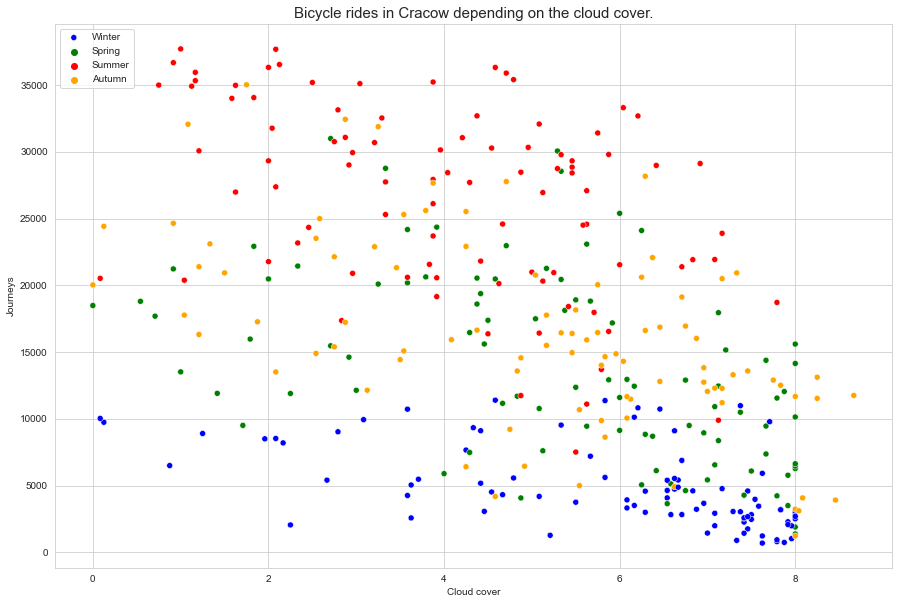

In [46]:
fontdict = {'fontsize':20,'fontweight':'bold'}
fig = plt.figure()
plt.rcParams['figure.figsize'] = [15,10]
plt.subplots_adjust(wspace=0.5, hspace=0.5)

plt.title('Bicycle rides in Cracow depending on the cloud cover.', fontsize=15)
sns.scatterplot(cracow_agg.Cloud_cover, cracow_agg.Journeys, hue = cracow_agg.Season, palette=['green','red','orange','blue'])
plt.xlabel('Cloud cover')
plt.legend(loc='upper left', labels=['Winter','Spring','Summer','Autumn'])
plt.show()

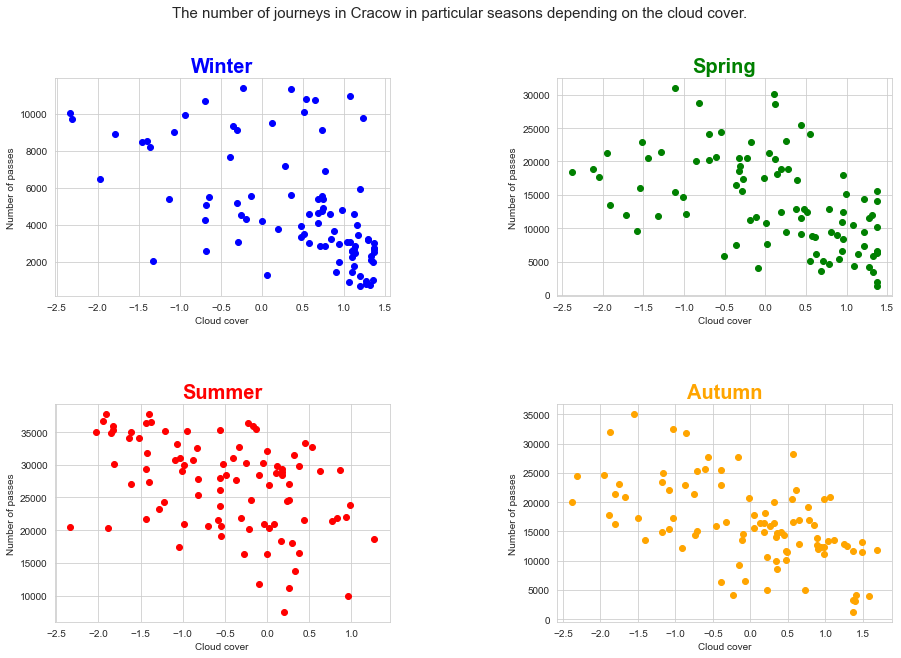

In [48]:
fig3 = plt.figure(figsize=[15,10])
plt.subplots_adjust(wspace=0.5, hspace=0.5)

plt.suptitle('The number of journeys in Cracow in particular seasons depending on the cloud cover.', fontsize=15)

ax1 = fig3.add_subplot(221)
ax1.scatter('cloudscaled','Journeys',data = cracow_agg[cracow_agg.Season == 4],c="blue")
ax1.set_title('Winter', color="blue", fontdict = fontdict)
ax1.set_ylabel('Number of passes')
ax1.set_xlabel('Cloud cover')

ax2 = fig3.add_subplot(222)
ax2.scatter('cloudscaled','Journeys',data = cracow_agg[cracow_agg.Season == 1],c="green")
ax2.set_title('Spring', color="green", fontdict = fontdict)
ax2.set_ylabel('Number of passes')
ax2.set_xlabel('Cloud cover')

ax3 = fig3.add_subplot(223)
ax3.scatter('cloudscaled','Journeys',data = cracow_agg[cracow_agg.Season == 2],c="red")
ax3.set_title('Summer', color="red", fontdict=fontdict)
ax3.set_ylabel('Number of passes')
ax3.set_xlabel('Cloud cover')

ax4 = fig3.add_subplot(224)
ax4.scatter('cloudscaled','Journeys',data = cracow_agg[cracow_agg.Season == 3],c="orange")
ax4.set_title('Autumn', color="orange", fontdict = fontdict)
ax4.set_ylabel('Number of passes')
ax4.set_xlabel('Cloud cover')
plt.show()

<hr>

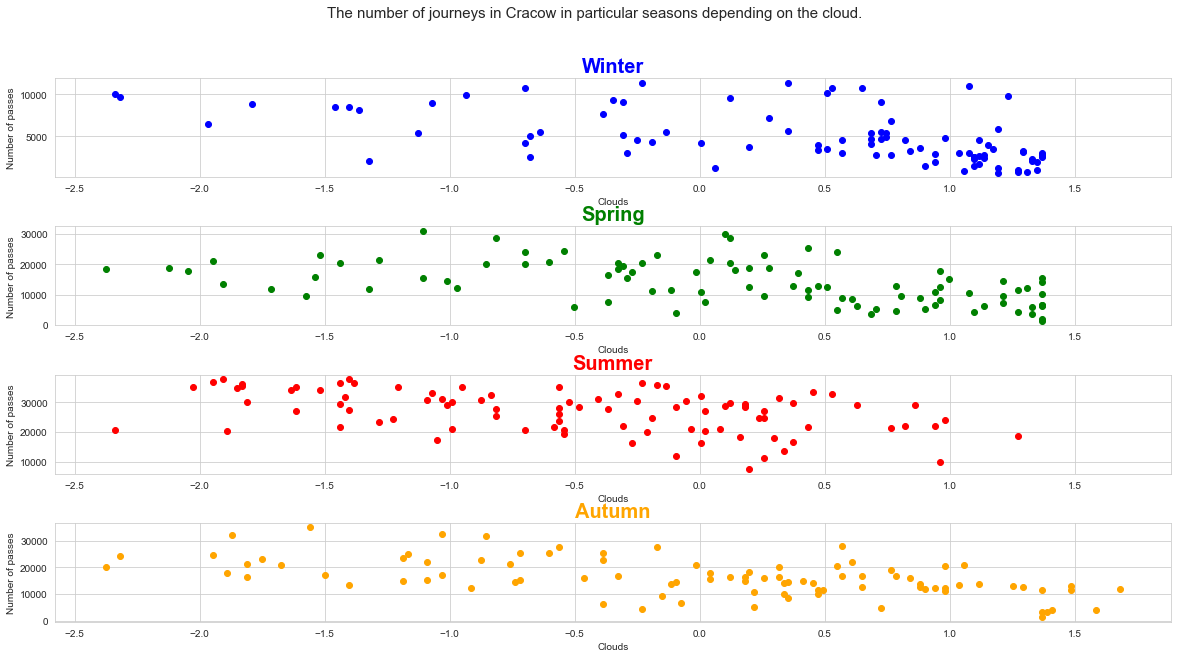

In [49]:
fig4 = plt.figure(figsize=[20,10])
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.suptitle('The number of journeys in Cracow in particular seasons depending on the cloud.', fontsize=15)

ax1 = fig4.add_subplot(411)
ax1.scatter('cloudscaled', 'Journeys', data = cracow_agg[cracow_agg.Season == 4],c="blue")
ax1.set_title('Winter', color="blue", fontdict = fontdict)
ax1.set_ylabel('Number of passes')
ax1.set_xlabel('Clouds')

ax2 = fig4.add_subplot(412, sharex=ax1)
ax2.scatter('cloudscaled', 'Journeys', data = cracow_agg[cracow_agg.Season == 1],c="green")
ax2.set_title('Spring', color="green", fontdict = fontdict)
ax2.set_ylabel('Number of passes')
ax2.set_xlabel('Clouds')

ax3 = fig4.add_subplot(413, sharex=ax1)
ax3.scatter('cloudscaled', 'Journeys', data = cracow_agg[cracow_agg.Season == 2],c="red")
ax3.set_title('Summer', color="red", fontdict = fontdict)
ax3.set_ylabel('Number of passes')
ax3.set_xlabel('Clouds')

ax4 = fig4.add_subplot(414, sharex=ax1)
ax4.scatter('cloudscaled', 'Journeys', data = cracow_agg[cracow_agg.Season == 3],c="orange")
ax4.set_title('Autumn', color="orange", fontdict = fontdict)
ax4.set_ylabel('Number of passes')
ax4.set_xlabel('Clouds')
plt.show()

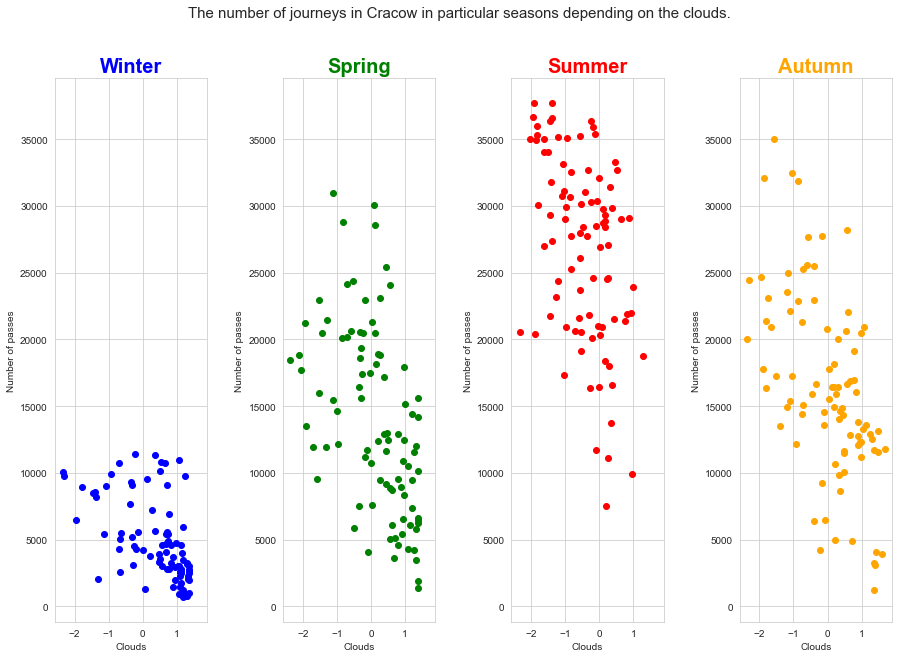

In [50]:
fig5 = plt.figure(figsize=[15,10])
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.suptitle('The number of journeys in Cracow in particular seasons depending on the clouds.', fontsize=15)

ax1 = fig5.add_subplot(141)
ax1.scatter('cloudscaled', 'Journeys', data = cracow_agg[cracow_agg.Season == 4],c="blue")
ax1.set_title('Winter', color="blue", fontdict = fontdict)
ax1.set_ylabel('Number of passes')
ax1.set_xlabel('Clouds')

ax2 = fig5.add_subplot(142, sharex=ax1, sharey=ax1)
ax2.scatter('cloudscaled', 'Journeys', data = cracow_agg[cracow_agg.Season == 1],c="green")
ax2.set_title('Spring', color="green", fontdict = fontdict)
ax2.set_ylabel('Number of passes')
ax2.set_xlabel('Clouds')

ax3 = fig5.add_subplot(143, sharex=ax1, sharey=ax1)
ax3.scatter('cloudscaled', 'Journeys', data = cracow_agg[cracow_agg.Season == 2],c="red")
ax3.set_title('Summer', color="red", fontdict=fontdict)
ax3.set_ylabel('Number of passes')
ax3.set_xlabel('Clouds')

ax4 = fig5.add_subplot(144, sharex=ax1, sharey=ax1)
ax4.scatter('cloudscaled', 'Journeys', data = cracow_agg[cracow_agg.Season == 3],c="orange")
ax4.set_title('Autumn', color="orange", fontdict=fontdict)
ax4.set_ylabel('Number of passes')
ax4.set_xlabel('Clouds')
plt.show()

Wind speed

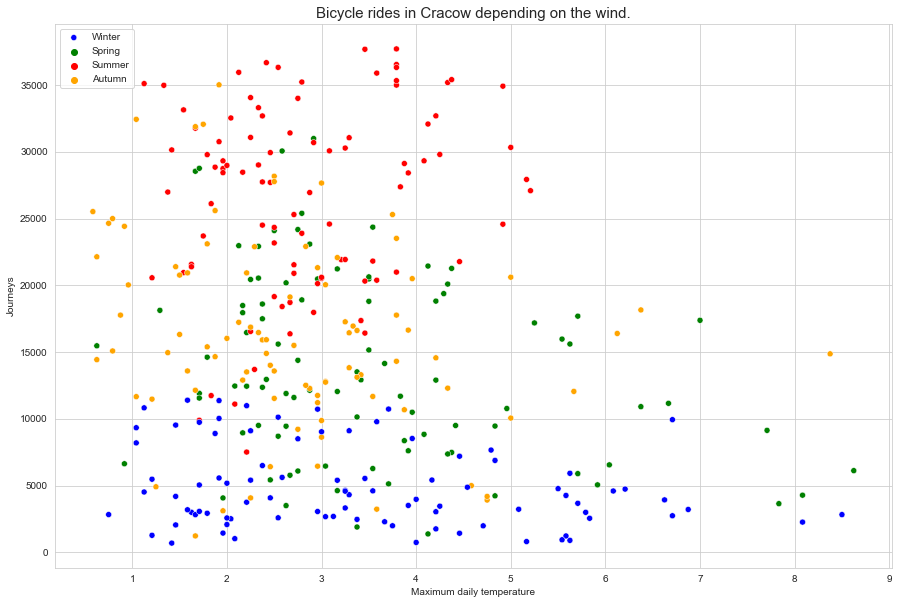

In [51]:
fontdict = {'fontsize':20,'fontweight':'bold'}
fig = plt.figure()
plt.rcParams['figure.figsize'] = [15,10]
plt.subplots_adjust(wspace=0.5, hspace=0.5)

plt.title('Bicycle rides in Cracow depending on the wind.', fontsize=15)
sns.scatterplot(cracow_agg.Wind_speed, cracow_agg.Journeys, hue = cracow_agg.Season, palette=['green','red','orange','blue'])
plt.xlabel('Maximum daily temperature')
plt.legend(loc='upper left', labels=['Winter','Spring','Summer','Autumn'])
plt.show()

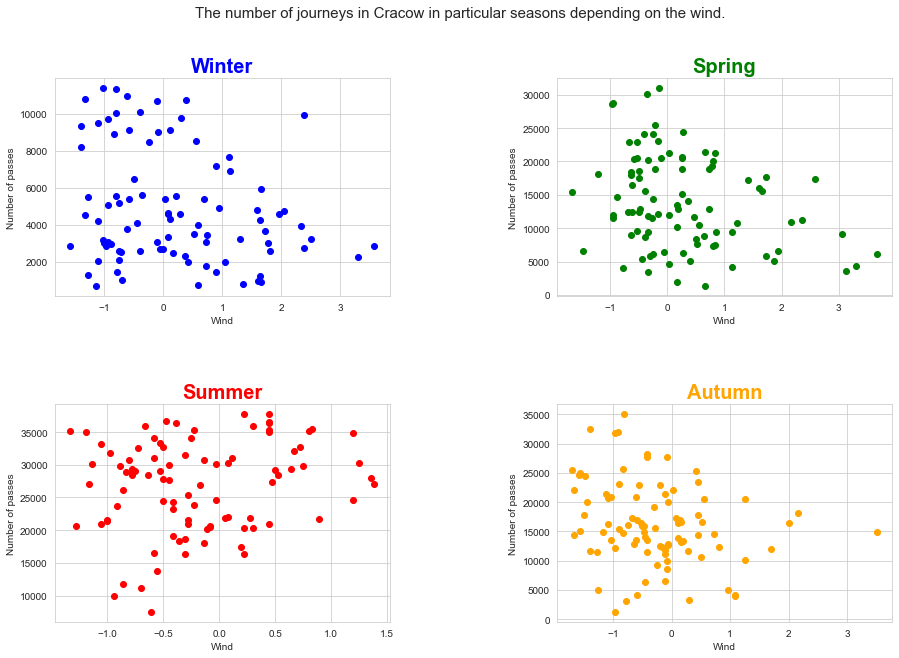

In [52]:
fig3 = plt.figure(figsize=[15,10])
plt.subplots_adjust(wspace=0.5, hspace=0.5)

plt.suptitle('The number of journeys in Cracow in particular seasons depending on the wind.', fontsize=15)

ax1 = fig3.add_subplot(221)
ax1.scatter('windscaled','Journeys',data = cracow_agg[cracow_agg.Season == 4],c="blue")
ax1.set_title('Winter', color="blue", fontdict = fontdict)
ax1.set_ylabel('Number of passes')
ax1.set_xlabel('Wind')

ax2 = fig3.add_subplot(222)
ax2.scatter('windscaled','Journeys',data = cracow_agg[cracow_agg.Season == 1],c="green")
ax2.set_title('Spring', color="green", fontdict = fontdict)
ax2.set_ylabel('Number of passes')
ax2.set_xlabel('Wind')

ax3 = fig3.add_subplot(223)
ax3.scatter('windscaled','Journeys',data = cracow_agg[cracow_agg.Season == 2],c="red")
ax3.set_title('Summer', color="red", fontdict=fontdict)
ax3.set_ylabel('Number of passes')
ax3.set_xlabel('Wind')

ax4 = fig3.add_subplot(224)
ax4.scatter('windscaled','Journeys',data = cracow_agg[cracow_agg.Season == 3],c="orange")
ax4.set_title('Autumn', color="orange", fontdict = fontdict)
ax4.set_ylabel('Number of passes')
ax4.set_xlabel('Wind')
plt.show()

<hr>

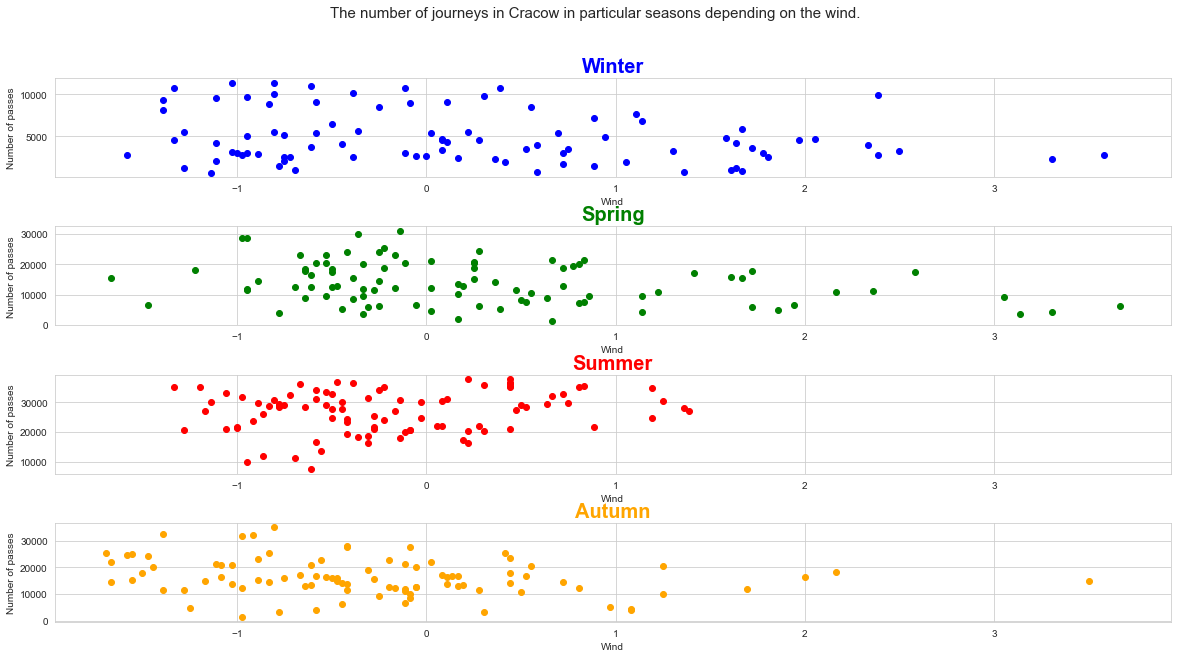

In [53]:
fig4 = plt.figure(figsize=[20,10])
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.suptitle('The number of journeys in Cracow in particular seasons depending on the wind.', fontsize=15)

ax1 = fig4.add_subplot(411)
ax1.scatter('windscaled', 'Journeys', data = cracow_agg[cracow_agg.Season == 4],c="blue")
ax1.set_title('Winter', color="blue", fontdict = fontdict)
ax1.set_ylabel('Number of passes')
ax1.set_xlabel('Wind')

ax2 = fig4.add_subplot(412, sharex=ax1)
ax2.scatter('windscaled', 'Journeys', data = cracow_agg[cracow_agg.Season == 1],c="green")
ax2.set_title('Spring', color="green", fontdict = fontdict)
ax2.set_ylabel('Number of passes')
ax2.set_xlabel('Wind')

ax3 = fig4.add_subplot(413, sharex=ax1)
ax3.scatter('windscaled', 'Journeys', data = cracow_agg[cracow_agg.Season == 2],c="red")
ax3.set_title('Summer', color="red", fontdict = fontdict)
ax3.set_ylabel('Number of passes')
ax3.set_xlabel('Wind')

ax4 = fig4.add_subplot(414, sharex=ax1)
ax4.scatter('windscaled', 'Journeys', data = cracow_agg[cracow_agg.Season == 3],c="orange")
ax4.set_title('Autumn', color="orange", fontdict = fontdict)
ax4.set_ylabel('Number of passes')
ax4.set_xlabel('Wind')
plt.show()

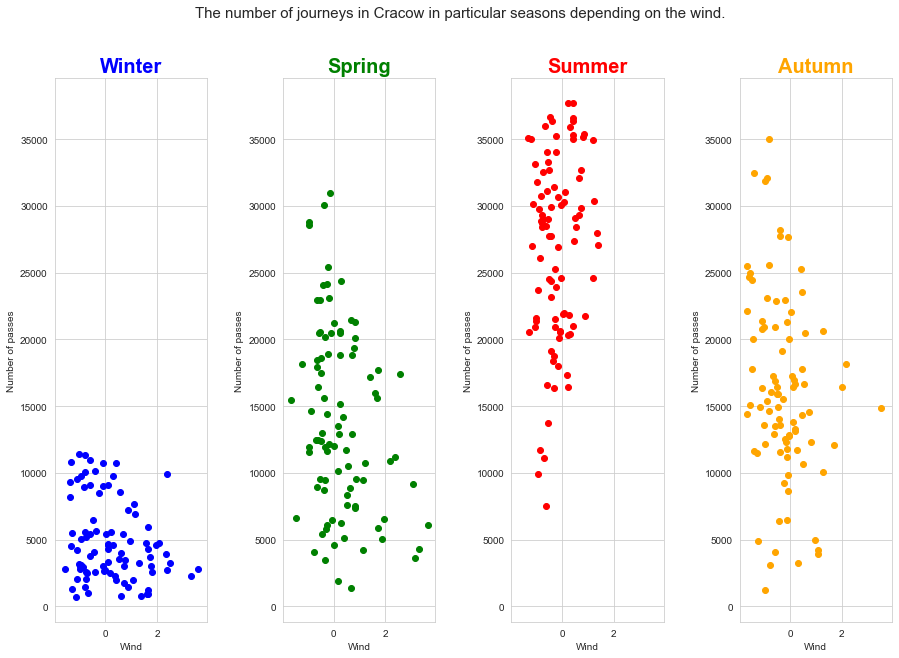

In [54]:
fig5 = plt.figure(figsize=[15,10])
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.suptitle('The number of journeys in Cracow in particular seasons depending on the wind.', fontsize=15)

ax1 = fig5.add_subplot(141)
ax1.scatter('windscaled', 'Journeys', data = cracow_agg[cracow_agg.Season == 4],c="blue")
ax1.set_title('Winter', color="blue", fontdict = fontdict)
ax1.set_ylabel('Number of passes')
ax1.set_xlabel('Wind')

ax2 = fig5.add_subplot(142, sharex=ax1, sharey=ax1)
ax2.scatter('windscaled', 'Journeys', data = cracow_agg[cracow_agg.Season == 1],c="green")
ax2.set_title('Spring', color="green", fontdict = fontdict)
ax2.set_ylabel('Number of passes')
ax2.set_xlabel('Wind')

ax3 = fig5.add_subplot(143, sharex=ax1, sharey=ax1)
ax3.scatter('windscaled', 'Journeys', data = cracow_agg[cracow_agg.Season == 2],c="red")
ax3.set_title('Summer', color="red", fontdict=fontdict)
ax3.set_ylabel('Number of passes')
ax3.set_xlabel('Wind')

ax4 = fig5.add_subplot(144, sharex=ax1, sharey=ax1)
ax4.scatter('windscaled', 'Journeys', data = cracow_agg[cracow_agg.Season == 3],c="orange")
ax4.set_title('Autumn', color="orange", fontdict=fontdict)
ax4.set_ylabel('Number of passes')
ax4.set_xlabel('Wind')
plt.show()

Conclusions:
- the number of passes is quite strongly correlated with comp_0 component (temperature is part of this element)
- the density of the timetables varies depending on the season (spring and autumn have similar distributions)

<hr>